# System with spring

## Table of Contents

- [Batches and the Data Structure](#batches-and-the-data-structure)
- [Query Data](#query-data)
- [Initial Parameters](#initial-parameters)
- [System Motion Animation](#system-motion-animation)
- [Plot Trajectories](#plot-trajectories)
- [Statistics](#statistics)
- [Standard Deviation Test](#standard-deviation-test)

## Batches and the Data Structure

Let's assume we have created a batch named 'spring_system_angles' consisting of 5 simulations, in which the initial angles of the second pendulum were randomly selected from a normal distribution with a mean of 10 degrees and a standard deviation of 5 degrees.

In [1]:
from citros_data_analysis import data_access as da

Let's create CitrosDB object to query and plot the results of the simulation. Let's specify that we would like to see batches that were created with system with spring simulation scenario:

In [2]:
citros = da.CitrosDB(simulation = 'simulation_system_with_spring')

To print information about all batches created in 'simulation_double_pendulum' simulation, call `search_batch()`:

In [3]:
citros.search_batch()

{'spring_system_angles': {'id': '08992c0b-0b1b-4709-b5d3-0cb2c3d0a557',
  'sid': [0, 1, 2, 3, 4],
  'created_at': '2023-11-28T07:27:43.507169+00:00',
  'updated_at': '2023-11-28T11:26:36.142873+00:00',
  'status': 'SCHEDULE',
  'data_status': 'LOADED',
  'data_last_access': '2023-11-28T11:26:36.142873+00:00',
  'tag': '0e96e8f85a557a9a40ad036c784773acca95f60c',
  'simulation': 'simulation_system_with_spring',
  'message': 'random initial angle of the second pendulum, gauss 10, 5',
  'parallelism': 1,
  'completions': 5,
  'cpu': 2,
  'gpu': 0,
  'memory': '265',
  'repo': 'pendulum',
  'link': 'https://citros.io/pendulum/data/runs/simulation_system_with_spring/spring_system_angles'},
 'cloud_test_system_with_spring_1': {'id': '24c1988a-e6d9-4270-a776-a90554102ea7',
  'sid': [0],
  'created_at': '2023-11-26T08:37:36.041625+00:00',
  'updated_at': '2023-11-26T15:06:24.034059+00:00',
  'status': 'DONE',
  'data_status': 'LOADED',
  'data_last_access': '2023-11-26T15:06:24.034059+00:00',
 

Let's display the names of the batches that contain simulations marked as 'DONE', signifying their successful completion:

In [4]:
list(citros.search_batch(sid_status='DONE').keys())

['spring_system_angles',
 'cloud_test_system_with_spring_1',
 'cloud_test_system_with_spring']

Print general information about the most recent simulation. In this simulation we have two topics: '/config' and '/coordinates':

In [5]:
citros.batch(-1).info().print()

{
 'size': '801 kB',
 'sid_count': 5,
 'sid_list': [0, 1, 2, 3, 4],
 'topic_count': 2,
 'topic_list': ['/config', '/coordinates'],
 'message_count': 1015
}


Topic '/config' contains initial parameters of the simulation, topic '/coordinates' contains result of the simulation. Let's look on data structure of the topic '/coordinates':

In [6]:
citros.batch(-1).topic('/coordinates').info().print()

{
 'size': '796 kB',
 'sid_count': 5,
 'sid_list': [0, 1, 2, 3, 4],
 'topic_count': 1,
 'topic_list': ['/coordinates'],
 'message_count': 1005,
 'topics': {
   '/coordinates': {
     'type': 'system_with_spring_interfaces/msg/SpringSystem',
     'data_structure': {
       'data': {
         't': 'float',
         'p1': {
           'x': 'float',
           'y': 'float',
           '__msgtype__': 'str'
         },
         'p2': {
           'x': 'float',
           'y': 'float',
           '__msgtype__': 'str'
         },
         'p3': {
           'x': 'float',
           'y': 'float',
           '__msgtype__': 'str'
         },
         'spr': {
           'x0': 'float',
           'x1': 'float',
           'y0': 'float',
           'y1': 'float',
           '__msgtype__': 'str'
         },
         '__msgtype__': 'str'
       }
     },
     'message_count': 1005
   }
 }
}


As we stated in the README, the result of the simulation has the following structure: there is time coordinate 'data.t', two coordinates of the three pendulums: data.p1.x, data.p1.y, data.p2.x, data.p2.y, data.p3.x, data.p3.y and coordinates of the start and end of the spring: data.spr.x0, data.spr.x1, data.spr.y0, data.spr.y1:

In [7]:
citros.batch(-1).topic('/coordinates').info()['topics']['/coordinates']['data_structure']['data'].print()

{
 't': 'float',
 'p1': {
   'x': 'float',
   'y': 'float',
   '__msgtype__': 'str'
 },
 'p2': {
   'x': 'float',
   'y': 'float',
   '__msgtype__': 'str'
 },
 'p3': {
   'x': 'float',
   'y': 'float',
   '__msgtype__': 'str'
 },
 'spr': {
   'x0': 'float',
   'x1': 'float',
   'y0': 'float',
   'y1': 'float',
   '__msgtype__': 'str'
 },
 '__msgtype__': 'str'
}


## Query Data

Let's query data by `data()` method. If we call `data()` method without arguments we get all data separated by columns.


The output of the `data()` method is a pandas.DataFrame, so every method of the pandas.DataFrame can be applied to the result of the query.
Here by `head()` method we left only first 5 rows of the output:

In [8]:
citros.batch(-1).topic('/coordinates').data().head(5)

,sid,rid,time,topic,type,data.t,data.__msgtype__,data.p1.x,data.p1.y,data.p1.__msgtype__,...,data.p2.y,data.p2.__msgtype__,data.p3.x,data.p3.y,data.p3.__msgtype__,data.spr.x0,data.spr.x1,data.spr.y0,data.spr.y1,data.spr.__msgtype__
0,0,0,1701158298855433846,/coordinates,system_with_spring_interfaces/msg/SpringSystem,0.00,system_with_spring_interfaces/msg/SpringSystem,0.140000,-0.069282,system_with_spring_interfaces/msg/PendulumCoord,...,-0.264766,system_with_spring_interfaces/msg/PendulumCoord,-0.160000,-0.277128,system_with_spring_interfaces/msg/PendulumCoord,-0.100000,0.165357,-0.173205,-0.186572,system_with_spring_interfaces/msg/SpringCoord
1,0,1,1701158298955397886,/coordinates,system_with_spring_interfaces/msg/SpringSystem,0.05,system_with_spring_interfaces/msg/SpringSystem,0.132641,-0.073038,system_with_spring_interfaces/msg/PendulumCoord,...,-0.268628,system_with_spring_interfaces/msg/PendulumCoord,-0.151349,-0.281946,system_with_spring_interfaces/msg/PendulumCoord,-0.094593,0.157703,-0.176216,-0.190392,system_with_spring_interfaces/msg/SpringCoord
2,0,2,1701158299055375014,/coordinates,system_with_spring_interfaces/msg/SpringSystem,0.10,system_with_spring_interfaces/msg/SpringSystem,0.111467,-0.079174,system_with_spring_interfaces/msg/PendulumCoord,...,-0.275261,system_with_spring_interfaces/msg/PendulumCoord,-0.125621,-0.294312,system_with_spring_interfaces/msg/PendulumCoord,-0.078513,0.135089,-0.183945,-0.196826,system_with_spring_interfaces/msg/SpringCoord
3,0,3,1701158299155343867,/coordinates,system_with_spring_interfaces/msg/SpringSystem,0.15,system_with_spring_interfaces/msg/SpringSystem,0.084713,-0.078526,system_with_spring_interfaces/msg/PendulumCoord,...,-0.276499,system_with_spring_interfaces/msg/PendulumCoord,-0.084473,-0.308649,system_with_spring_interfaces/msg/PendulumCoord,-0.052796,0.101754,-0.192906,-0.197310,system_with_spring_interfaces/msg/SpringCoord
4,0,4,1701158299255369908,/coordinates,system_with_spring_interfaces/msg/SpringSystem,0.20,system_with_spring_interfaces/msg/SpringSystem,0.065994,-0.072413,system_with_spring_interfaces/msg/PendulumCoord,...,-0.272409,system_with_spring_interfaces/msg/PendulumCoord,-0.032714,-0.318323,system_with_spring_interfaces/msg/PendulumCoord,-0.020446,0.066757,-0.198952,-0.192410,system_with_spring_interfaces/msg/SpringCoord


We can query not all data, but, for example, only time and x coordinates of the pendulums:

In [9]:
citros.batch(-1).topic('/coordinates').data(['data.t', 'data.p1.x', 'data.p2.x', 'data.p3.x']).head(5)

,sid,rid,time,topic,type,data.t,data.p1.x,data.p2.x,data.p3.x
0,0,0,1701158298855433846,/coordinates,system_with_spring_interfaces/msg/SpringSystem,0.00,0.140000,0.182262,-0.160000
1,0,1,1701158298955397886,/coordinates,system_with_spring_interfaces/msg/SpringSystem,0.05,0.132641,0.174410,-0.151349
2,0,2,1701158299055375014,/coordinates,system_with_spring_interfaces/msg/SpringSystem,0.10,0.111467,0.150837,-0.125621
3,0,3,1701158299155343867,/coordinates,system_with_spring_interfaces/msg/SpringSystem,0.15,0.084713,0.113115,-0.084473
4,0,4,1701158299255369908,/coordinates,system_with_spring_interfaces/msg/SpringSystem,0.20,0.065994,0.067265,-0.032714


## Initial Parameters

In '/config' topic we can find all the initial parameters.

In [10]:
name = 'data.system_with_spring.ros__parameters'
params = citros.batch(-1).topic('/config').data(name, additional_columns='sid')
params = params[params[name].notna()].set_index('sid')[name]

print(f"pandas.Series with initial parameters for the simulation runs:\n{params}")

pandas.Series with initial parameters for the simulation runs:
sid
0    {'T': 10.0, 'h': 0.05, 'k': 100.0, 'l0': 0.05,...
1    {'T': 10.0, 'h': 0.05, 'k': 100.0, 'l0': 0.05,...
2    {'T': 10.0, 'h': 0.05, 'k': 100.0, 'l0': 0.05,...
3    {'T': 10.0, 'h': 0.05, 'k': 100.0, 'l0': 0.05,...
4    {'T': 10.0, 'h': 0.05, 'k': 100.0, 'l0': 0.05,...
Name: data.system_with_spring.ros__parameters, dtype: object


In the batch that we prepared earlier we varied the initial angle of the second pendulum picking each value from the normal distribution with mean equals 10 and standard deviation equals 5. Let's print these initial values too:

In [11]:
name = 'data.system_with_spring.ros__parameters.a2_0'
a2_0 = citros.batch('spring_system_angles').topic('/config').data(name, additional_columns='sid').rename({name: 'a2_0'}, axis = 1)
a2_0 = a2_0[a2_0['a2_0'].notna()]
print(f"\ninitial angles for the second pendulum:\n{a2_0['a2_0']}")


initial angles for the second pendulum:
0    12.198991
2     7.780114
4     5.573969
6    17.468404
8    13.479588
Name: a2_0, dtype: float64


## System Motion Animation

Let's query data and plot the animation of the system motion, for example for the first simulation run (sid = 0). We will also need to know the distance x0 between the double and third pendulums - we can take it from the `params`, that we get earlier:

In [12]:
F = citros.batch(-1).sid(0).topic('/coordinates').data()
x0 = params[0]['x0']

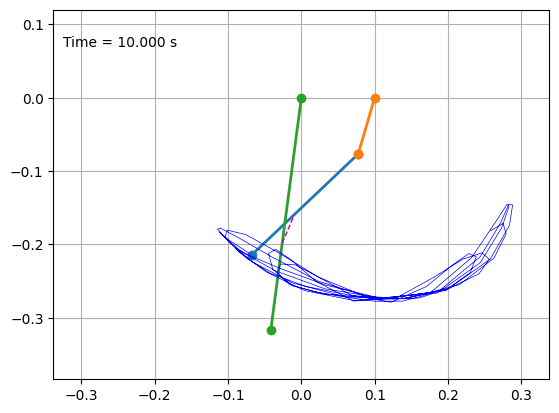

In [13]:
import matplotlib.pyplot as plt
from collections import deque

def animate(F, x0):
    # length of the history trace
    trace_len = 100

    max_y_0 = abs(min([min(F['data.p2.y']), min(F['data.p3.y'])]))*1.2
    max_y_1 = max([max(F['data.p1.y']), max(F['data.p2.y']), max(F['data.p3.y']), 0.1])*1.2
    max_x = max([max(abs(F['data.p1.x'])), max(abs(F['data.p2.x'])), max(abs(F['data.p3.x']))])*1.2

    fig = plt.figure()
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-max_x, max_x), ylim=(-max_y_0, max_y_1))
    ax.set_aspect('equal', 'datalim')
    ax.grid()

    line1, = ax.plot([], [], 'o-', lw=2)
    line2, = ax.plot([], [], 'o-', lw=2)
    line3, = ax.plot([], [], 'o-', lw=2)
    line4, = ax.plot([], [], 'm--', lw=1)
    trace, = ax.plot([], [], 'b-', lw=0.5, ms=1)
    time_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
    trace_x, trace_y = deque(maxlen=trace_len), deque(maxlen=trace_len)

    plt.close()
    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        trace.set_data([], [])
        line3.set_data([], [])
        line4.set_data([], [])
        time_text.set_text('')
        trace_x.clear()
        trace_y.clear()
        return line1, line2, trace, time_text

    def animate_frame(i):
        trace_x.appendleft(F['data.p2.x'].iloc[i])
        trace_y.appendleft(F['data.p2.y'].iloc[i])

        line1.set_data([[F['data.p1.x'].iloc[i],F['data.p2.x'].iloc[i]],[F['data.p1.y'].iloc[i], F['data.p2.y'].iloc[i]]])
        line2.set_data([[x0,F['data.p1.x'].iloc[i]],[0, F['data.p1.y'].iloc[i]]])
        line3.set_data([[0,F['data.p3.x'].iloc[i]],[0, F['data.p3.y'].iloc[i]]])
        line4.set_data([[F['data.spr.x0'].iloc[i],F['data.spr.x1'].iloc[i]],[F['data.spr.y0'].iloc[i], F['data.spr.y1'].iloc[i]]])
        trace.set_data(trace_x, trace_y)

        time_text.set_text('Time = %.3f s' % F['data.t'].iloc[i])
        return line1, line2, line3, line4, trace, time_text

    init()
    for i in range(len(F)):
        animate_frame(i)
        display(fig, clear=True)

animate(F, x0)

## Plot Trajectories

Small variations in the initial parameters of the double pendulum system lead to significant changes in trajectories.
Let's plot the trajectories for simulations where the initial angle of the second pendulum is set randomly from the normal distribution (mean = 10, std = 5)

Let's print the initial angles using the '/config' topic:

In [14]:
col_name = 'data.system_with_spring.ros__parameters.a2_0'

a2_0 = citros.batch('spring_system_angles').topic('/config').data(col_name, additional_columns='sid').rename({col_name: 'a2_0'}, axis = 1)
a2_0 = a2_0 [a2_0 ['a2_0'].notna()].set_index('sid')
a2_0

,a2_0
sid,
0,12.198991
1,7.780114
2,5.573969
3,17.468404
4,13.479588


Let's plot the trajectory of the second pendulum for the first 5 seconds of the simulations:

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='data.p2.x', ylabel='data.p2.y'>)

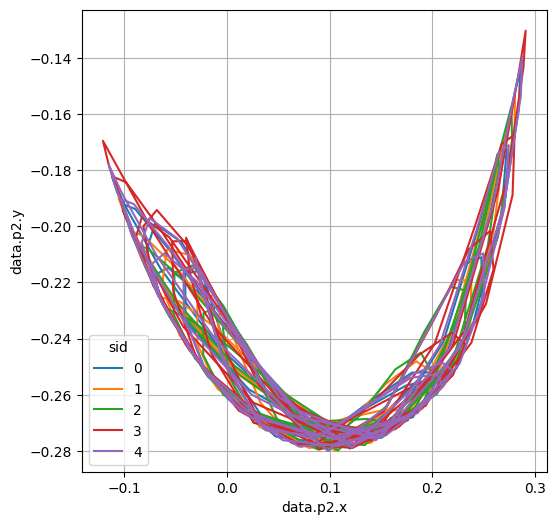

In [15]:
F = citros.batch('spring_system_angles').set_filter({'data.t': {'<': 5}}).topic('/coordinates').data()
citros.plot_graph(F, 'data.p2.x', 'data.p2.y')

Let's plot the trajectory of the second pendulum from the first and second simulations:

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='data.p2.x', ylabel='data.p2.y'>)

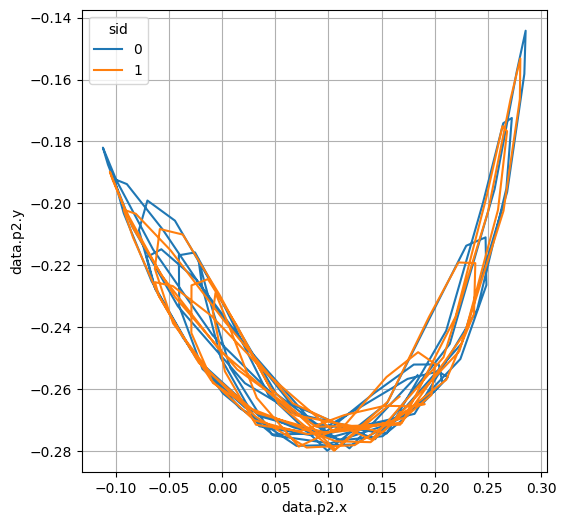

In [16]:
F = citros.batch('spring_system_angles').set_filter({'data.t': {'<': 5}}).topic('/coordinates').sid([0,1]).data()
citros.plot_graph(F, 'data.p2.x', 'data.p2.y')

## Statistics

We can examine how the coordinates of the second pendulum, along with their mean values and standard deviations, change over time using the `citros_data_analysis.error_analysis` package:

/home/ros/.local/lib/python3.10/site-packages/citros_data_analysis/error_analysis/citros_data.py:1097: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


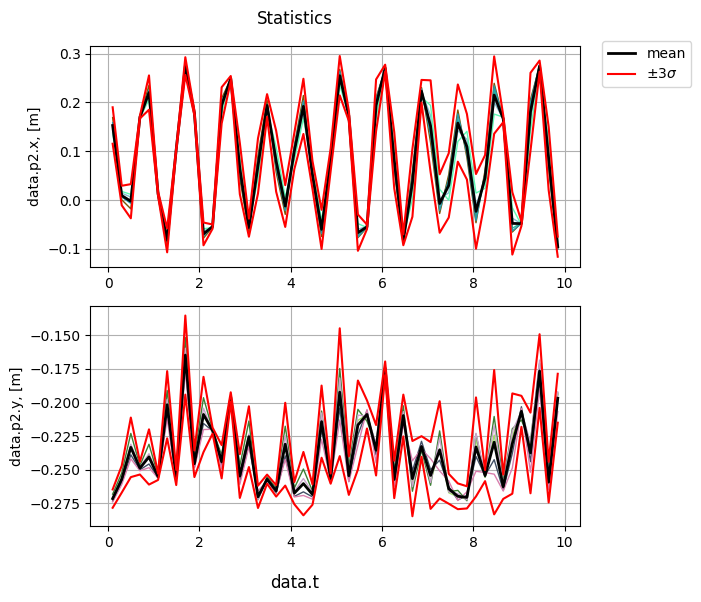

In [17]:
from citros_data_analysis import error_analysis as analysis
F = citros.batch('spring_system_angles').set_filter({'data.t': {'<': 10}}).topic('/coordinates').data()
dataset = analysis.CitrosData(F, data_label=['data.p2.x', 'data.p2.y'], units = 'm')
db = dataset.bin_data(n_bins = 50, param_label = 'data.t')
db.show_statistics()

Let's plot the scatter plot of the last points of the simulation (around 'data.t' = 10). Let's also depict 1-, 2-, 3-sigma error ellipses and print parameters of the 1-sigma ellipse:

slice_id = 49,
slice_val = 9.8505


{'x': -0.09570844581021368,
 'y': -0.19677773693500375,
 'width': 0.018307954033186084,
 'height': 0.0009331142614018917,
 'alpha': -41.37009843159381}

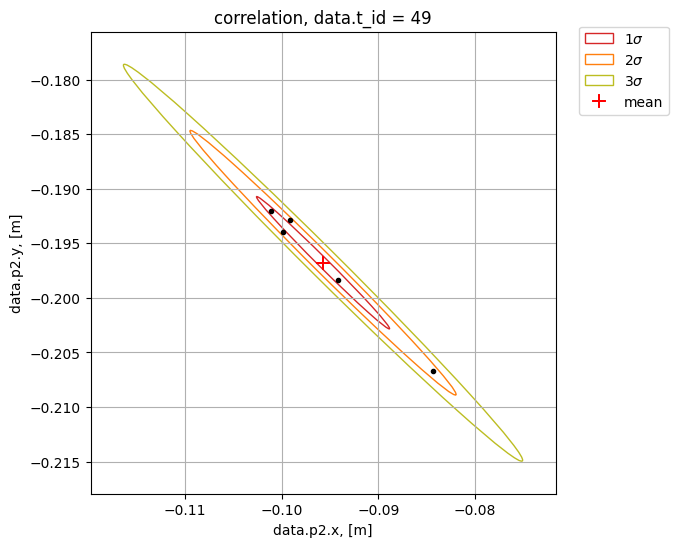

In [18]:
ellipse_param = db.show_correlation(x_col = 'data.p2.x', y_col = 'data.p2.y',
                      slice_val = 10, n_std = [1,2,3], return_ellipse_param = True)
ellipse_param[0]

## Standard Deviation Test

By utilizing different tests from the `citros_data_analysis.validation` package, you can quickly determine whether the simulation meets specific conditions. For instance, let's check if the 3-sigma standard deviation does not exceed 0.15 for x coordinate and less then 0.1 for y coordinate:

std_test: passed


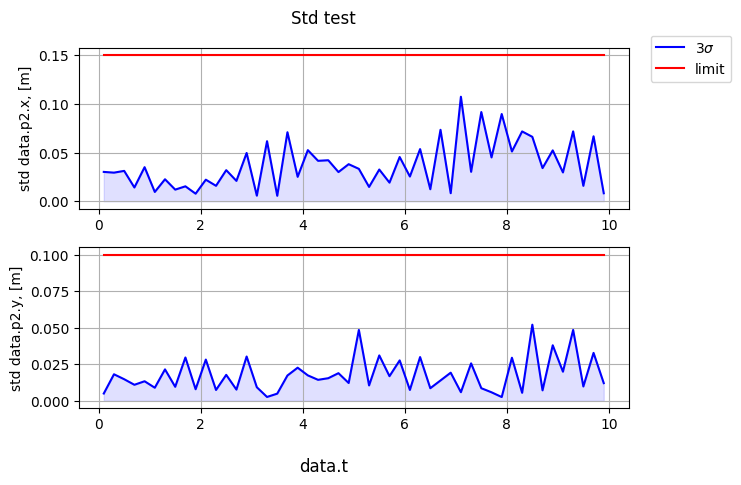

In [19]:
from citros_data_analysis import validation as va
F = citros.batch('spring_system_angles').topic('/coordinates').data()
V = va.Validation(F, data_label = ['data.p2.x', 'data.p2.y'], param_label = 'data.t', method = 'bin', num = 50, units = 'm')
log, table, fig = V.std_test(limits = [0.15, 0.1], n_std = 3, std_area = True)

In [20]:
ref = da.Ref()
ref.print()

REFERENCES:

yalyalieva lidia, lidia@lulav.space
spring_system_angles, 'random initial angle of the second pendulum, gauss 10, 5', 2023-11-28 07:27:43
https://citros.io/pendulum/batch/08992c0b-0b1b-4709-b5d3-0cb2c3d0a557/

